In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


In [5]:
dataset = pd.read_csv('term-deposit-marketing-2020.csv')
dataset.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no


In [6]:
dataset.dtypes ##Looking data types
dataset[dataset.isnull().any(axis=1)] # Checked for any rows containing a NaN value

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y


## LabelEncoder

In [7]:
from sklearn import preprocessing   
le = preprocessing.LabelEncoder()   
dataset['job'] = le.fit_transform(dataset['job'])
dataset['marital'] = le.fit_transform(dataset['marital'])
dataset['education'] = le.fit_transform(dataset['education'])
dataset['default'] = le.fit_transform(dataset['default'])
dataset['contact'] = le.fit_transform(dataset['contact'])
dataset['month'] = le.fit_transform(dataset['month'])
dataset['housing'] = le.fit_transform(dataset['housing'])
dataset['loan'] = le.fit_transform(dataset['loan'])
dataset['y'] = le.fit_transform(dataset['y'])


dataset.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0


## Getting training and target column

In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting Data

In [9]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
#5-Fold Cross-Validation for Logistic Regression
logreg_scores = cross_val_score(logreg, X_train, y_train, cv=5)
print("min score:",logreg_scores.min(),"  mean score:", logreg_scores.mean(), "  max score:", logreg_scores.max())
cm = confusion_matrix(y_test, y_pred)
print(cm)

/Users/mertagcakoyun/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/mertagcakoyun/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

min score: 0.9313333333333333   mean score: 0.9328666666666667   max score: 0.9343333333333333
[[9158   93]
 [ 616  133]]


/Users/mertagcakoyun/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/mertagcakoyun/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

## K-Nearest Neighbor Classifier

In [11]:


from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2) # if p=2, it will be euclidian distance
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#5-Fold Cross-Validation for KNN
knn_scores = cross_val_score(classifier, X_train, y_train, cv=5)
print("Cross Validation Scores:")
print("min score:",knn_scores.min(),"  mean score:", knn_scores.mean(), "  max score:", knn_scores.max())
cm = confusion_matrix(y_test, y_pred)
print(cm)

Cross Validation Scores:
min score: 0.9236666666666666   mean score: 0.9248333333333333   max score: 0.9265
[[9136  115]
 [ 659   90]]


## Decision Tree Classifier

In [12]:
#DecisionTree Algorithm
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_score = dtc.score(X_test, y_test)

#5-Fold Cross-Validation for 
dtc_scores = cross_val_score(classifier, X_train, y_train, cv=5)
print("min score:",dtc_scores.min(),"  mean score:", dtc_scores.mean(), "  max score:", dtc_scores.max())
cm = confusion_matrix(y_test, y_pred)
print(cm)

min score: 0.9236666666666666   mean score: 0.9248333333333333   max score: 0.9265
[[9136  115]
 [ 659   90]]


## Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)

#5-Fold Cross-Validation for Random Forest Classifier
rf_scores = cross_val_score(classifier, X_train, y_train, cv=5)
print("min score:",rf_scores.min(),"  mean score:", rf_scores.mean(), "  max score:", rf_scores.max())
cm = confusion_matrix(y_test, y_pred)
print(cm)

min score: 0.9236666666666666   mean score: 0.9248333333333333   max score: 0.9265
[[9136  115]
 [ 659   90]]


## Naive Bayes Classifier

In [15]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

#5-Fold Cross-Validation for Naive Bayes Classifier
nb_scores = cross_val_score(nb, X_train, y_train, cv=5)
print("min score:",nb_scores.min(),"  mean score:", nb_scores.mean(), "  max score:", nb_scores.max())
cm = confusion_matrix(y_test, y_pred)
print(cm)

min score: 0.928   mean score: 0.9306666666666666   max score: 0.9331666666666667
[[9136  115]
 [ 659   90]]


## Comparing Accuracy to Choose the Best Algorithm

Logistic Regression  Accuracy Score: 93.4333%
KNN  Accuracy Score: 92.6500%
Naive Bayes  Accuracy Score: 93.3167%
Decision Tree  Accuracy Score: 92.6500%
Random Forest  Accuracy Score: 92.6500%


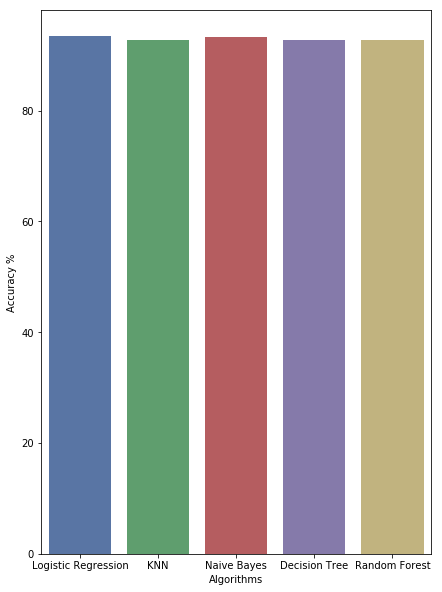

In [16]:
methods = ["Logistic Regression","KNN", "Naive Bayes", "Decision Tree", "Random Forest"]
accuracy = [logreg_scores.max()*100, knn_scores.max()*100, nb_scores.max()*100, dtc_scores.max()*100, rf_scores.max()*100]

plt.figure(figsize=(7,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette="deep")

for name,score in zip(methods,accuracy):
    print(name," Accuracy Score: {:.4f}%".format(score))

## Using PCA for finding the most effective feature on result

In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components = 13, whiten=True)
pca.fit(X)
x_pca = pca.transform(X)


In [18]:
print(pca.explained_variance_ratio_)

[9.92064050e-01 7.91329876e-03 1.08694055e-05 8.08688567e-06
 1.35091550e-06 1.20962204e-06 9.13058086e-07 8.13825269e-08
 6.11236542e-08 3.64204645e-08 2.37121172e-08 1.65895693e-08
 2.30333518e-09]


In [19]:
df_sns=pd.DataFrame({'features': ["age","job","marital","education","default","balance","housing","loan","contact",
                                  "day","month","duration","campaign"],'variance': pca.explained_variance_ratio_ })
df_sns

,features,variance
0,age,9.920640e-01
1,job,7.913299e-03
2,marital,1.086941e-05
3,education,8.086886e-06
4,default,1.350915e-06
5,balance,1.209622e-06
6,housing,9.130581e-07
7,loan,8.138253e-08
8,contact,6.112365e-08
9,day,3.642046e-08


<function matplotlib.pyplot.show(*args, **kw)>

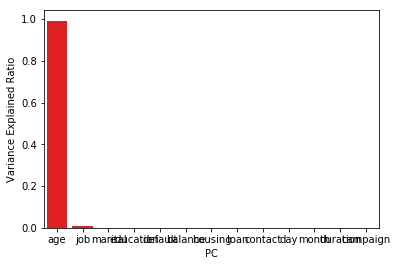

In [20]:
sns.barplot(x='features',y='variance',data=df_sns, color='r',)
plt.ylabel("Variance Explained Ratio")
plt.xlabel("PC")
plt.show

### According the these result: The most effective feature is Age. In my opinion we must focus to these feature for finding customers who are more likely to buy the investment product